[14.12239545 14.12239545 14.12264563 ... 13.79180585 13.78971191
 13.78761287]
[14.16184828 14.16184828 14.16209486 ... 14.16648579 14.16748675
 14.16849505]
45.07992007992008
initial angle = 45.07992007992008 degrees


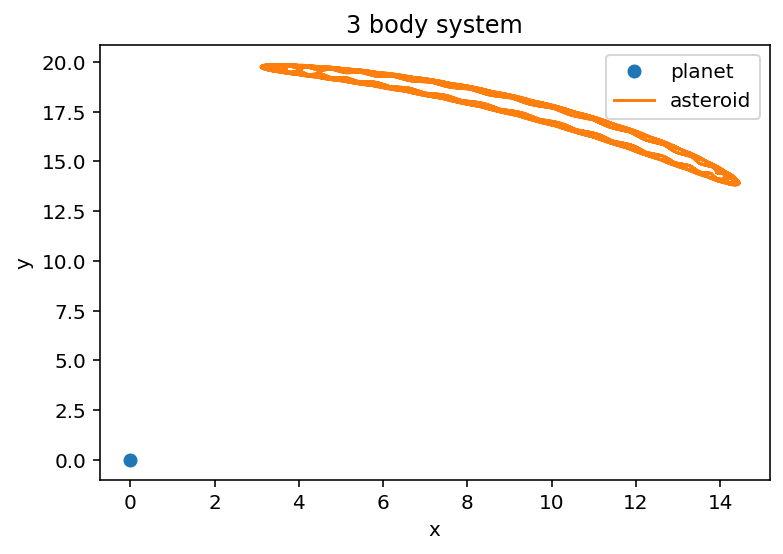

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

###PART 1###

#constants and initial positions
ms = 1e7 #mass of the sun
mp = 1e4 #mass of jupiter
ma = 1 #mass of asteroid

G  = 1

R = 20 #|rs - rp|

###1a###
xs = 0 #sun is at x=0
###1b###
xp = R #jupiter is 20 units away

rs = np.array([xs,0])
rp = np.array([xp,0])
#print(rs,rp)

rcm = (rp*mp + rs*ms)/(mp + ms)
#print(rcm)

###1c###
rs = rs - rcm
rp = rp - rcm
#print(rs)

theta = np.radians(45+4*rcm[0])
xa = R * np.cos(theta)
ya = R * np.sin(theta)

ra = np.array([xa,ya])
#print(xa,ya)

###PART 2###
mu = ms * mp / (ms + mp)
omega = np.sqrt((G*ms*mp)/(mu * R**3))

vs = omega * rs[::-1]
vp = omega * rp[::-1]
va = np.array([-omega * ra[0], omega*ra[1]])
#print(vs)
#print(vp)
#print(va)

ys = np.concatenate([rs,vs])
yp = np.concatenate([rp,vp])
ya = np.concatenate([ra,va])

y0 = np.concatenate((ys,yp,ya))
#print(y0)

###PART 3###
def KeplerODE(t,y):
    global mp,ms,G #global?

    rs = y[0:2] #print(rs) = [x,y]
    vs = y[2:4]
    rp = y[4:6]  
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]
    
    r_sp = np.sqrt((rs[0]-rp[0])**2 + (rs[1]-rp[1])**2) # (xs-xp)**2 + (ys-yp)**2
    r_sa = np.sqrt((rs[0]-ra[0])**2 + (rs[1]-ra[1])**2)
    r_pa = np.sqrt((rp[0]-ra[0])**2 + (rp[1]-ra[1])**2)
    
    # SUN
    drdt_S = vs
    
    F_sp = (-G * ms * mp) / (r_sp**3) * (rs-rp)
    F_sa = (-G * ms * ma) / (r_sa**3) * (rs-ra)
    a_s    = (F_sp + F_sa) / ms
    
    dvdt_S = a_s
    
    dydt_S = np.concatenate((drdt_S,dvdt_S))
    
    # PLANET
    drdt_P = vp

    F_ps = (-G * ms * mp) / (r_sp**3) * (rp-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (rp-ra)
    a_p    = (F_ps + F_pa) / mp
    
    dvdt_P = a_p
    
    dydt_P = np.concatenate((drdt_P,dvdt_P))
    
    # ASTEROID
    drdt_A = va

    F_sa = (-G * ms * ma) / (r_sa**3) * (ra-rs)
    F_pa = (-G * mp * ma) / (r_pa**3) * (ra-rp)
    a_a    = (F_sa + F_pa) / ma
    
    dvdt_A = a_a
    
    dydt_A = np.concatenate((drdt_A,dvdt_A))
    
    dydt = np.concatenate((dydt_S,dydt_P,dydt_A))

    return dydt

###PART 5###
y = np.copy(y0)
t = 100
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G*(ms+mp)))
dt = P / n

asteroid_xcoords, asteroid_ycoords = np.array((y[8],y[9]))
transform = np.zeros((2,2))

for step in range(0,int(100*n)):
    
    xp,yp = (y[4],y[5])
    ra = (y[8],y[9])
    
    theta = np.arctan2(yp,xp)
    
    transform[0,:] = [np.cos(theta),np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    
    ra_prime = transform @ ra
    
    asteroid_xcoords = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoords = np.append(asteroid_ycoords,ra_prime[1])
    
    F1 = KeplerODE(step,y)
    
    y2 = y +(dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y +(dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y +(dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6) * (F1 + 2*F2 + 2*F3 + F4)
    
print(asteroid_xcoords)
print(asteroid_ycoords)
plt.plot(0,0,'o',label='planet')
plt.plot(asteroid_xcoords,asteroid_ycoords,label='asteroid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('3 body system')
print(45+4*rcm[0])
#####  INITIAL ANGLE = 45.07992007992008 DEGREES #####
## this yields the smallest distance collectively between the x and y values of the asteroid positions.
print('initial angle = 45.07992007992008 degrees')

In [2]:
#45-rcm[0]

#[14.14706637 14.14706637 14.14700474 ... 13.58876017 13.58726899
# 13.58577398]
#[14.13720316 14.13720316 14.13714182 ... 14.4188478  14.41965406
# 14.42046353]

In [3]:
#45+rcm[0]

#[14.13720316 14.13720316 14.13726625 ... 13.67001554 13.66828053
# 13.66654119]
#[14.14706637 14.14706637 14.1471282  ... 14.31819327 14.31907912
# 14.31996983]

In [4]:
#45+2*rcm[0]

#[14.13226898 14.13226898 14.13239443 ... 13.71063282 13.70877725
# 13.70691709]
#[14.15199539 14.15199539 14.1521188  ... 14.26771161 14.26863642
# 14.26956691]

In [5]:
#45+3*rcm[0]

#[14.12733307 14.12733307 14.12752089 ... 13.75123242 13.74925721
# 13.74727715]
#[14.1569227  14.1569227  14.15710769 ... 14.21713918 14.21810237
# 14.21907206]

In [6]:
#45+4*rcm[0] = about 45.07992007992008
#[14.12239545 14.12239545 14.12264563 ... 13.79180585 13.78971191
# 13.78761287]
#[14.16184828 14.16184828 14.16209486 ... 14.16648579 14.16748675
# 14.16849505]